In [1]:
import os
from pathlib import Path
import tensorflow
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
p = Path("./newDataset/")

In [3]:
dirs = p.glob("*") #  "*" will give everything present  in this path
#for d in dirs:     # dir is a generator object 
#    print(d)

In [4]:
image_data =[]  #arrray to store all image data
labels = []    # store all image labels.

#optional to store inage path
image_path =[] 

#in machine learning labels are stored as integers rather than strings
label_dict = {'Pikachu':0,'Bulbasaur':1,'Meowth':2}
label2pokemon = {0:'Pikachu',1:'Bulbasaur',2:'Meowth'}
for folder_dir in dirs:  #iterate over folder directories
    label = os.path.basename(folder_dir)  #we are converting classname to string
    #so that we can use it later. WE are splitting it near slash and extracting the last string 
    
    cnt =0
   # print(label)
    
    #iterate over all folder directories and pick all the images
    
    print(folder_dir)
    for img_path in folder_dir.glob("*.jpg"): #glob method helps in iterate over directories
        img =image.load_img(img_path,target_size = (100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt+=1
        
    print(cnt)    

newDataset/Pikachu
199
newDataset/Bulbasaur
174
newDataset/Meowth
70


# Visulization

In [5]:
import numpy as np
print(len(image_data))
print(len(labels))

443
443


In [6]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape,Y.shape)

(443, 100, 100, 3) (443,)


In [7]:
# draw some pokemons

In [8]:
def drawImg(img,ls):
    plt.title(label2pokemon[ls])
    plt.imshow(img)
    plt.show()

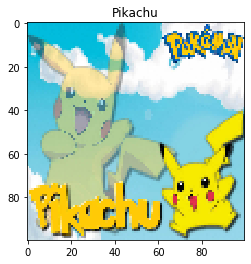

In [9]:
drawImg(X[0]/255,Y[0])